### Original writer HarisMichailidis

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Sotiris/Desktop/project/data/failed_auth.my_log.csv')

df.index = pd.to_datetime(df['date'])
df.drop(columns=['date','timestamp','logline'],inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 810 entries, 2018-03-27 14:54:57 to 2018-04-20 13:50:51
Data columns (total 3 columns):
hostname    810 non-null object
user        767 non-null object
ip          810 non-null object
dtypes: object(3)
memory usage: 25.3+ KB


In [4]:
df.head()

,hostname,user,ip
date,,,
2018-03-27 14:54:57,ip-10-77-20-248,support,95.152.57.58
2018-03-27 17:08:34,ip-10-77-20-248,test,85.245.107.41
2018-03-27 18:22:24,ip-10-77-20-248,admin,201.177.23.130
2018-03-27 18:27:20,ip-10-77-20-248,support,190.178.62.6
2018-03-27 19:17:03,ip-10-77-20-248,admin,201.43.243.37


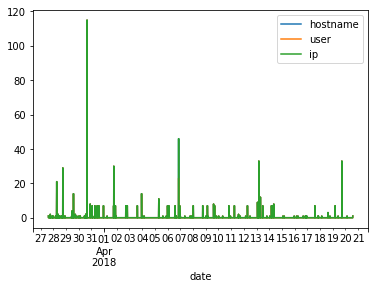

In [5]:
# in the x-pack example buckets of 5 min are used
# in the kibana inteface all informations are in buckets of 1 hour

df.resample('10Min').count().plot()

In [6]:
# the user field should not be part of the aggregation
# it is just a type of informations about the failed login

# maybe not even the hostname; in our case a single hostname is present so no need to take care of this
import numpy as np

# replace empty user value in data from float('nan') to empty string
df['user'] = np.where(pd.isnull(df['user']), '', df['user'])

# unique username and hostname    
grouped_size_df = df.groupby([pd.Grouper(freq='10Min'),'ip']).agg({'user': ['count', lambda x: set(x)],
                                                                   'hostname': lambda x: set(x)})
                                    


grouped_size_df.columns = ['attempts', 'user authentication provided', 'hostnames']


grouped_size_df.describe()

,attempts
count,152.000000
mean,5.328947
std,11.687304
min,1.000000
25%,1.000000
50%,1.000000
75%,7.000000
max,115.000000


In [7]:
grouped_size_df.head(15)

attempts  \
date                ip                          
2018-03-27 14:50:00 95.152.57.58            1   
2018-03-27 17:00:00 85.245.107.41           1   
2018-03-27 18:20:00 190.178.62.6            1   
                    201.177.23.130          1   
2018-03-27 19:10:00 201.43.243.37           1   
2018-03-27 22:00:00 112.135.124.229         1   
2018-03-27 22:40:00 62.73.115.98            1   
2018-03-27 23:40:00 2.60.103.231            1   
2018-03-28 04:20:00 31.162.4.186            1   
2018-03-28 05:20:00 118.180.18.102          1   
2018-03-28 06:00:00 5.144.9.33              1   
2018-03-28 06:20:00 91.197.232.109          8   
2018-03-28 06:30:00 91.197.232.109         21   
2018-03-28 07:30:00 14.185.87.49            1   
2018-03-28 08:30:00 190.96.200.229          1   

                                                          user authentication provided  \
date                ip                                                                   
2018-03-27 14:50:00 95.152.57.58                                             {support}   
2018-03-27 17:00:00 85.245.107.41                                               {test}   
2018-03-27 18:20:00 190.178.62.6                                             {support}   
                    201.177.23.130                                             {admin}   
2018-03-27 19:10:00 201.43.243.37                                              {admin}   
2018-03-27 22:00:00 112.135.124.229                                          {ftpuser}   
2018-03-27 22:40:00 62.73.115.98                                               {admin}   
2018-03-27 23:40:00 2.60.103.231                                             {default}   
2018-03-28 04:20:00 31.162.4.186                                               {admin}   
2018-03-28 05:20:00 118.180.18.102                                             {admin}   
2018-03-28 06:00:00 5.144.9.33                                                  {test}   
2018-03-28 06:20:00 91.197.232.109                {0, 010101, 1234, 1111, 0000, admin}   
2018-03-28 06:30:00 91.197.232.109   {gpadmin, support, ftpuser, git, api, pi, test...   
2018-03-28 07:30:00 14.185.87.49                                               {admin}   
2018-03-28 08:30:00 190.96.200.229                                              {test}   

                                             hostnames  
date                ip                                  
2018-03-27 14:50:00 95.152.57.58     {ip-10-77-20-248}  
2018-03-27 17:00:00 85.245.107.41    {ip-10-77-20-248}  
2018-03-27 18:20:00 190.178.62.6     {ip-10-77-20-248}  
                    201.177.23.130   {ip-10-77-20-248}  
2018-03-27 19:10:00 201.43.243.37    {ip-10-77-20-248}  
2018-03-27 22:00:00 112.135.124.229  {ip-10-77-20-248}  
2018-03-27 22:40:00 62.73.115.98     {ip-10-77-20-248}  
2018-03-27 23:40:00 2.60.103.231     {ip-10-77-20-248}  
2018-03-28 04:20:00 31.162.4.186     {ip-10-77-20-248}  
2018-03-28 05:20:00 118.180.18.102   {ip-10-77-20-248}  
2018-03-28 06:00:00 5.144.9.33       {ip-10-77-20-248}  
2018-03-28 06:20:00 91.197.232.109   {ip-10-77-20-248}  
2018-03-28 06:30:00 91.197.232.109   {ip-10-77-20-248}  
2018-03-28 07:30:00 14.185.87.49     {ip-10-77-20-248}  
2018-03-28 08:30:00 190.96.200.229   {ip-10-77-20-248}

In [8]:
# For anomaly detectors sanity check keep only the attempts column 

grouped_size = pd.Series(grouped_size_df['attempts'].values,index = grouped_size_df.index)

# Import DSIO

In [9]:
from dsio.anomaly_detectors import Gaussian1D, Percentile1D, compute_confusion_matrix

x = grouped_size

In [10]:
x[:10]

date                 ip             
2018-03-27 14:50:00  95.152.57.58       1
2018-03-27 17:00:00  85.245.107.41      1
2018-03-27 18:20:00  190.178.62.6       1
                     201.177.23.130     1
2018-03-27 19:10:00  201.43.243.37      1
2018-03-27 22:00:00  112.135.124.229    1
2018-03-27 22:40:00  62.73.115.98       1
2018-03-27 23:40:00  2.60.103.231       1
2018-03-28 04:20:00  31.162.4.186       1
2018-03-28 05:20:00  118.180.18.102     1
dtype: int64

## Gaussian1D

In [11]:
detector = Gaussian1D()
detector.fit(x[:10])

In [13]:
# make sure std is not zero 
# can happen as most of the failures have a total number of attempts count equal to 1

# TODO hardcoded
# better implementaion
if detector.std_ == 0:
    detector.std_ = 1

In [14]:
detector_output = detector.flag_anomaly(x)
x[list(detector_output)]

date                 ip             
2018-03-28 06:20:00  91.197.232.109       8
2018-03-28 06:30:00  91.197.232.109      21
2018-03-28 18:00:00  91.197.232.109      29
2018-03-29 11:30:00  85.245.107.41        4
2018-03-29 14:10:00  181.25.206.27       14
2018-03-30 15:50:00  24.151.103.17      115
2018-03-30 16:00:00  24.151.103.17       32
2018-03-30 21:50:00  181.25.201.155       8
2018-03-31 01:30:00  122.189.198.238      7
2018-03-31 06:30:00  60.187.118.40        7
2018-03-31 11:00:00  42.184.142.151       7
2018-03-31 14:10:00  82.64.2.59           7
2018-03-31 22:50:00  114.32.100.101       7
2018-04-01 18:00:00  123.153.146.183      7
2018-04-01 18:20:00  181.26.186.35       30
2018-04-01 20:30:00  183.152.79.79        7
2018-04-01 21:20:00  1.30.211.144         7
2018-04-02 17:00:00  93.120.176.237       7
2018-04-02 19:50:00  78.106.21.86         7
2018-04-03 14:50:00  112.251.168.248      7
2018-04-03 22:50:00  119.193.140.176      7
                     58.19.144.50      

In Elasticsearch x-pack example the following does not appear as an anomaly

| Time        | Host           | Ip  | Attempts |
| ------------- |:-------------:|:-----:| ---:| 
|2018-03-28 06:30:00 | 91.197.232.109 |  ip-10-77-20-248  |   21 |

although 21 different attempts where made
whereas the following does


| Time        | Host           | Ip  | Attempts |
| ------------- |:-------------:|:-----:| ---:| 
|2018-03-28 18:00:00 | 91.197.232.109 |  ip-10-77-20-248   |   29 |

This may have to do with the fit function implemted. A different profile for this user may require more attempts to trigger the anomaly detector


In [15]:
detector = Percentile1D()
detector.fit(x[:10])
detector_output = detector.flag_anomaly(x)
x[list(detector_output)]

date                 ip             
2018-03-28 06:20:00  91.197.232.109       8
2018-03-28 06:30:00  91.197.232.109      21
2018-03-28 09:10:00  5.74.204.136         2
2018-03-28 09:20:00  186.133.159.181      2
2018-03-28 18:00:00  91.197.232.109      29
2018-03-29 11:30:00  85.245.107.41        4
2018-03-29 14:10:00  181.25.206.27       14
2018-03-29 14:40:00  85.245.107.41        2
2018-03-29 17:40:00  24.151.103.17        2
2018-03-30 13:10:00  24.151.103.17        2
2018-03-30 13:20:00  24.151.103.17        2
2018-03-30 13:40:00  24.151.103.17        2
2018-03-30 15:20:00  85.245.107.41        2
2018-03-30 15:50:00  24.151.103.17      115
2018-03-30 16:00:00  24.151.103.17       32
2018-03-30 21:50:00  181.25.201.155       8
2018-03-31 01:30:00  122.189.198.238      7
2018-03-31 06:30:00  60.187.118.40        7
2018-03-31 11:00:00  42.184.142.151       7
2018-03-31 14:10:00  82.64.2.59           7
2018-03-31 22:50:00  114.32.100.101       7
2018-04-01 18:00:00  123.153.146.183   

Modify the table for dsio example. Same format as cardata_sample.csv, the original example provided
https://github.com/MentatInnovations/datastream.io/blob/master/examples/data/cardata_sample.csv

In [16]:
grouped_size_df.head()

attempts user authentication provided  \
date                ip                                                      
2018-03-27 14:50:00 95.152.57.58           1                    {support}   
2018-03-27 17:00:00 85.245.107.41          1                       {test}   
2018-03-27 18:20:00 190.178.62.6           1                    {support}   
                    201.177.23.130         1                      {admin}   
2018-03-27 19:10:00 201.43.243.37          1                      {admin}   

                                            hostnames  
date                ip                                 
2018-03-27 14:50:00 95.152.57.58    {ip-10-77-20-248}  
2018-03-27 17:00:00 85.245.107.41   {ip-10-77-20-248}  
2018-03-27 18:20:00 190.178.62.6    {ip-10-77-20-248}  
                    201.177.23.130  {ip-10-77-20-248}  
2018-03-27 19:10:00 201.43.243.37   {ip-10-77-20-248}

In [17]:
ips = pd.DataFrame(grouped_size_df.index.values.tolist())
user_ips = np.copy(np.array(ips[ips.columns[1]].tolist()))
dates = np.array(ips[ips.columns[0]].tolist())

In [18]:
import datetime

epoch = datetime.datetime.utcfromtimestamp(0)


def unix_time_millis(dt):
    return (dt - epoch).total_seconds() * 1000.0

pd.set_option('display.float_format', lambda x: '%.0f' % x)


grouped_size_df['time'] = [unix_time_millis(d) for d in dates]
grouped_size_df['ip'] = user_ips
grouped_size_df.index = range(1, len(grouped_size_df.index) + 1)


#grouped_size_df['timestamp'] = [unix_time_millis(d) for d in grouped_size_df.index]

In [19]:
grouped_size_df.head()

,attempts,user authentication provided,hostnames,time,ip
1,1,{support},{ip-10-77-20-248},1522162200000,95.152.57.58
2,1,{test},{ip-10-77-20-248},1522170000000,85.245.107.41
3,1,{support},{ip-10-77-20-248},1522174800000,190.178.62.6
4,1,{admin},{ip-10-77-20-248},1522174800000,201.177.23.130
5,1,{admin},{ip-10-77-20-248},1522177800000,201.43.243.37


In [20]:
grouped_size_df.to_csv('C:/Users/Sotiris/Desktop/project/data/failed_auth.my_log_attempts.csv', float_format='%.f')

Run a simple example

In [2]:
from dsio.main import restream_dataframe
from dsio.anomaly_detectors import Gaussian1D
import pandas as pd

dataframe = pd.read_csv('C:/Users/Sotiris/Desktop/project/data/failed_auth.my_log_attempts.csv', sep=',')

detector = Gaussian1D
restream_dataframe(dataframe, detector, sensors=['attempts'], cols=2, speed=20000000)

data found from 2018-03-27 17:50:00 to 2018-04-20 16:50:00
Converting to milliseconds ...
Done
Adding time offset of -1520641003249.45 seconds
Setting speed to 20000000x
Done


Loading BokehJS ...


Writing 13 rows dated 2018-03-16 12:39:10.548000 to 2018-03-16 12:39:13.548000
.....
Writing 0 rows dated 2018-03-16 12:39:09.277000 to 2018-03-16 12:39:12.277000
....
Writing 5 rows dated 2018-03-16 12:39:12.277000 to 2018-03-16 12:39:15.277000
...
Writing 15 rows dated 2018-03-16 12:39:13.548000 to 2018-03-16 12:39:16.548000
...
Writing 0 rows dated 2018-03-16 12:39:15.277000 to 2018-03-16 12:39:18.277000
...
Writing 6 rows dated 2018-03-16 12:39:16.548000 to 2018-03-16 12:39:19.548000
...
Writing 4 rows dated 2018-03-16 12:39:18.277000 to 2018-03-16 12:39:21.277000
...
Writing 6 rows dated 2018-03-16 12:39:19.548000 to 2018-03-16 12:39:22.548000
...
Writing 3 rows dated 2018-03-16 12:39:21.277000 to 2018-03-16 12:39:24.277000
...
Writing 13 rows dated 2018-03-16 12:39:22.548000 to 2018-03-16 12:39:25.548000
...
Writing 9 rows dated 2018-03-16 12:39:24.277000 to 2018-03-16 12:39:27.277000
...
Writing 6 rows dated 2018-03-16 12:39:25.548000 to 2018-03-16 12:39:28.548000
...
Writing 1